In [13]:
%matplotlib inline

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

pd.set_option('future.no_silent_downcasting', True)

### Processing Data

Process the data so that it can be visualized nicely.

In [20]:
occupations_list = pd.read_csv("../data/occupations.csv", header=0).to_numpy()
summary_statistics = pd.DataFrame(columns=['occupation', 'female', 'male', 'other', 'total'])
consolidated_data = pd.DataFrame()

for occupation in occupations_list:
        name = occupation[0]
        df_data = pd.read_csv(f'../data/csv_clean/{name}.csv')

        values = df_data['gender'].value_counts()
        occupation_row = {'occupation' : name, 
               'female': [values['female']],
               'male'  : [values['male']],
               'other' : [len(df_data) - values['female'] - values['male']],
               'total' : [len(df_data)]
               }
        
        summary_statistics = pd.concat([summary_statistics, pd.DataFrame(occupation_row)], ignore_index=True)
        #add occupation column to original df and append to a big df with all data
        df_data['occupation'] = name
        consolidated_data = pd.concat([consolidated_data, df_data], ignore_index=True)
summary_statistics = summary_statistics.fillna(0).infer_objects(copy=False)
summary_statistics.to_csv('../data/occupations_statistics.csv', index=False)
print(summary_statistics.sort_values(by=['total'], ascending=False, ignore_index=True))

          occupation  female   male  other  total
0             jurist    2985  27967      5  30957
1         politician    3035  18895      2  21932
2      mathematician    1915  17915      3  19833
3             priest     289  14770      1  15060
4              boxer     950  11692      1  12643
5             farmer    1375  10656      0  12031
6      tennis_player    5562   5459      1  11022
7             dancer    5074   3105     18   8197
8           diplomat     302   6921      2   7225
9          violinist    1337   4433      1   5771
10          wrestler     965   3532      5   4502
11     industrialist      47   3334      0   3381
12             nurse    3049    306      3   3358
13        cartoonist     657   2693      6   3356
14  fashion_designer    1669   1299      6   2974


Visualize the total amount of datapoints for each occupation to emphasize where the most data is accessible.

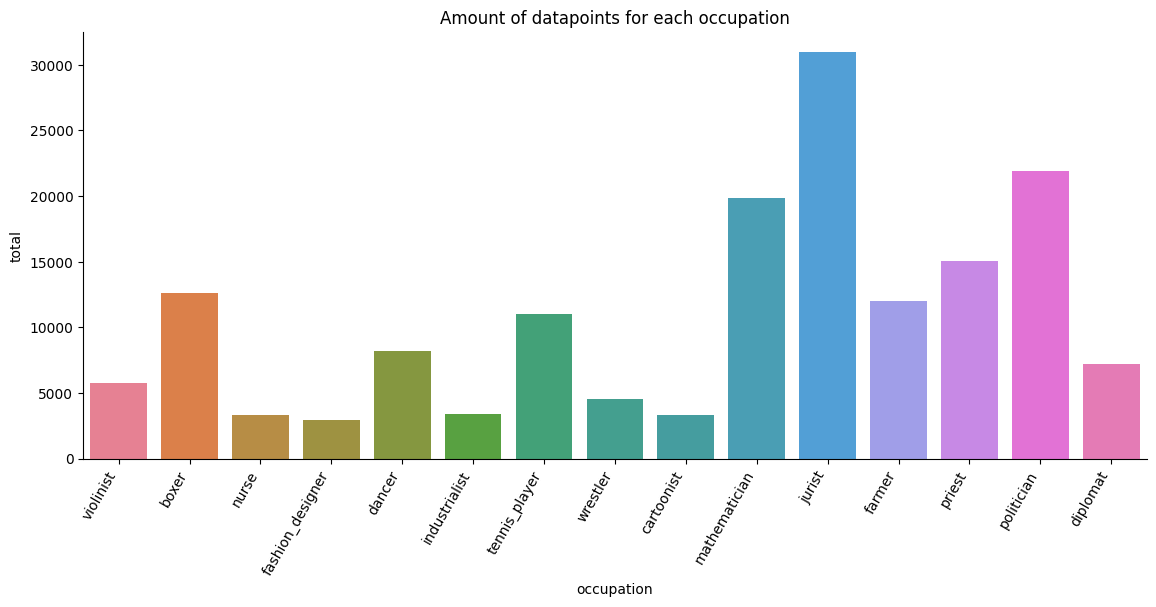

In [16]:
sns.catplot(data=summary_statistics, x='occupation', y='total', kind='bar', aspect=7/3, hue='occupation')
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=60, ha='right', va='top')
plt.show()

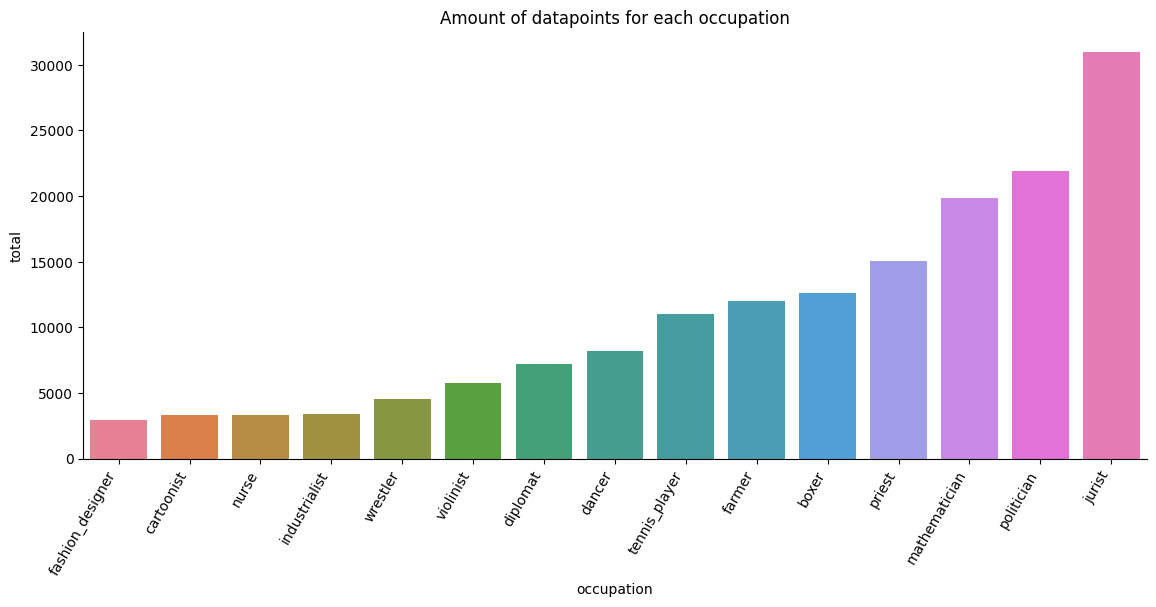

In [17]:
#distribution of datapoints
sns.catplot(data=summary_statistics.sort_values(by=['total']), x='occupation', y='total', kind='bar', aspect=7/3, hue='occupation')
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=60, ha='right', va='top')
plt.show()

Visualize the distribution of the genders for each occupation. This gives a first impression of gender distributions in each occupation based on real/historical context.

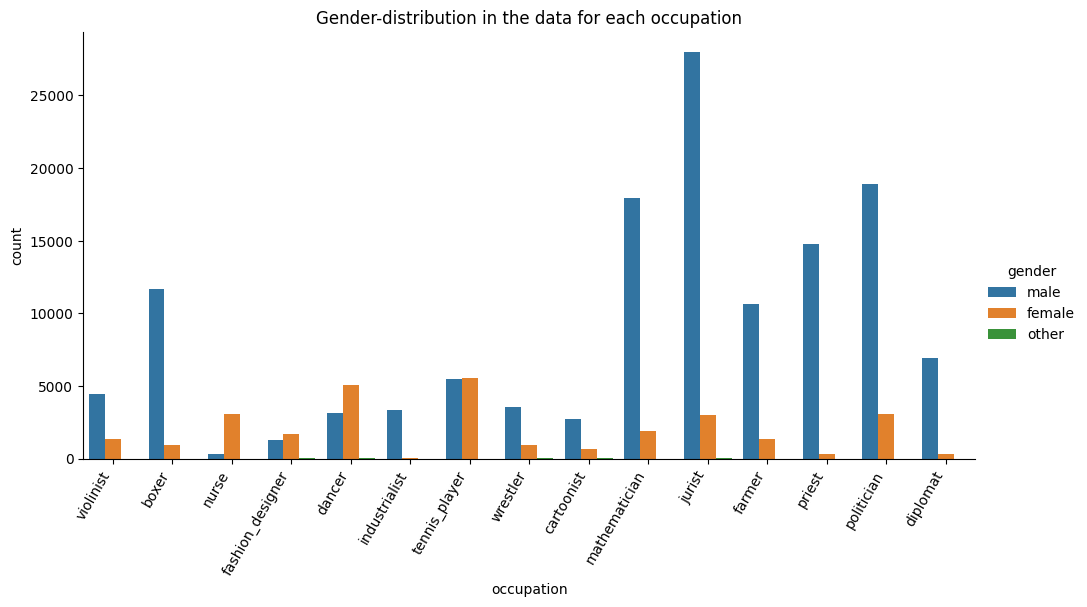

In [18]:
sns.catplot(data=consolidated_data, x='occupation', hue='gender', kind='count', aspect=2/1)
plt.title('Gender-distribution in the data for each occupation')
plt.xticks(rotation=60, ha='right', va='top')
plt.show()